<a href="https://colab.research.google.com/github/PatelAkashMafatlal/Walmart/blob/main/Walmart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Business Case: - Confidence Interval and CLT

# Business Problem:

The management team at walamrt inc. wants to analyze the Customer purchase baehvaior against the customer's genders and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on black friday than men? (Assume 50 million Customers are male and 50 million are female.)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


In [ ]:
df=pd.read_csv("walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
cols = ["Occupation","Marital_Status","Product_Category"]
df[cols]=df[cols].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


In [ ]:
df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
df.describe(include='object')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


Observations:

*   There are no missing values in the dataset.
*   Purchase amount might have Outliers.



# Checking null values

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
# How many users are there in Dataset?

In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
# How many products are there?

In [ ]:
df['Product_ID'].nunique()

3631

In [ ]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [ ]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
df_3 = pd.melt(df, id_vars=["User_ID"], value_vars=["Age"])
df_3.head()

,User_ID,variable,value
0,1000001,Age,0-17
1,1000001,Age,0-17
2,1000001,Age,0-17
3,1000001,Age,0-17
4,1000002,Age,55+


In [ ]:
age = df_3.groupby(["variable","value"])["value"]
age.value_counts()/len(df)*100

variable  value  value
Age       0-17   0-17      2.745479
          18-25  18-25    18.117760
          26-35  26-35    39.919974
          36-45  36-45    19.999891
          46-50  46-50     8.308246
          51-55  51-55     6.999316
          55+    55+       3.909335
Name: value, dtype: float64

In [ ]:
# The majority of the users are from the age bracket between "18-50", which is about 88%.

# pie chart for distribution of people in each Age bracket

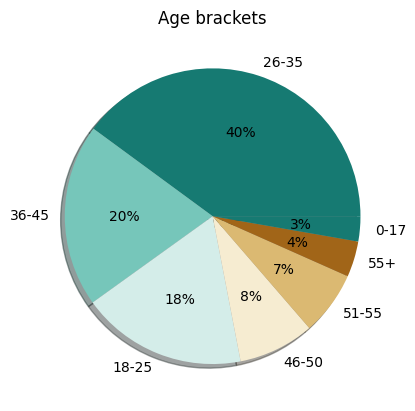

In [ ]:
data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color, shadow=True)
plt.title("Age brackets")
plt.show()

In [ ]:
df_4 = pd.melt(df, id_vars=["User_ID"], value_vars=["Marital_Status"])
df_4.head()

,User_ID,variable,value
0,1000001,Marital_Status,0
1,1000001,Marital_Status,0
2,1000001,Marital_Status,0
3,1000001,Marital_Status,0
4,1000002,Marital_Status,0


In [ ]:
marital_status = df_4.groupby(["variable","value"])["value"]
marital_status.value_counts()/len(df)*100

variable        value  value
Marital_Status  0      0        59.034701
                1      1        40.965299
Name: value, dtype: float64

In [ ]:
# 60% users are unmarried and 40% of the users are married.

In [ ]:
df_5 = pd.melt(df, id_vars=["User_ID"], value_vars=["Gender"])
df_5.head()

,User_ID,variable,value
0,1000001,Gender,F
1,1000001,Gender,F
2,1000001,Gender,F
3,1000001,Gender,F
4,1000002,Gender,M


In [ ]:
Gender = df_5.groupby(["variable","value"])["value"]
Gender.value_counts()/len(df)*100

variable  value  value
Gender    F      F        24.689493
          M      M        75.310507
Name: value, dtype: float64

In [ ]:
# 75% of the users are male and 25% of the users are female.

In [ ]:
df_6 = pd.melt(df, id_vars=["User_ID"], value_vars=["Stay_In_Current_City_Years"])
df_6.head()

,User_ID,variable,value
0,1000001,Stay_In_Current_City_Years,2
1,1000001,Stay_In_Current_City_Years,2
2,1000001,Stay_In_Current_City_Years,2
3,1000001,Stay_In_Current_City_Years,2
4,1000002,Stay_In_Current_City_Years,4+


In [ ]:
years = df_6.groupby(["variable","value"])["value"]
years.value_counts()/len(df)*100

variable                    value  value
Stay_In_Current_City_Years  0      0        13.525237
                            1      1        35.235825
                            2      2        18.513711
                            3      3        17.322404
                            4+     4+       15.402823
Name: value, dtype: float64

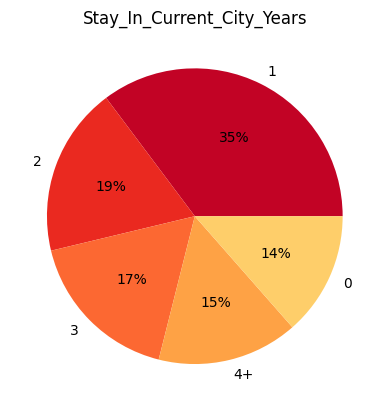

In [ ]:
data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
plt.title("Stay_In_Current_City_Years")
plt.show()

In [ ]:
df["Product_Category"].nunique()

20

In [ ]:
df["Occupation"].nunique()

21

# Univariate Analysis

understanding the distribution of data and detecting outliers for continuous variables

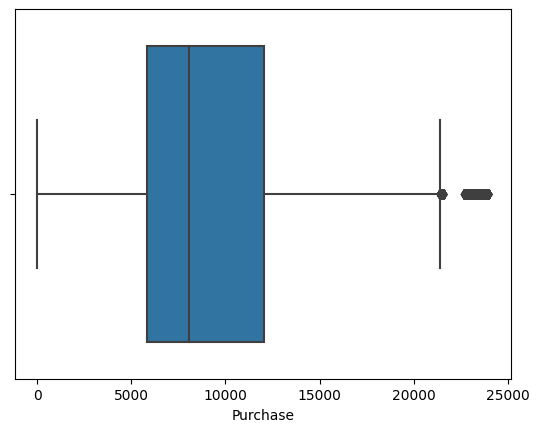

In [ ]:
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

In [ ]:
# Purchase column has outliers.

understanding the distribution of data for categorical variables

<Axes: xlabel='Marital_Status', ylabel='count'>

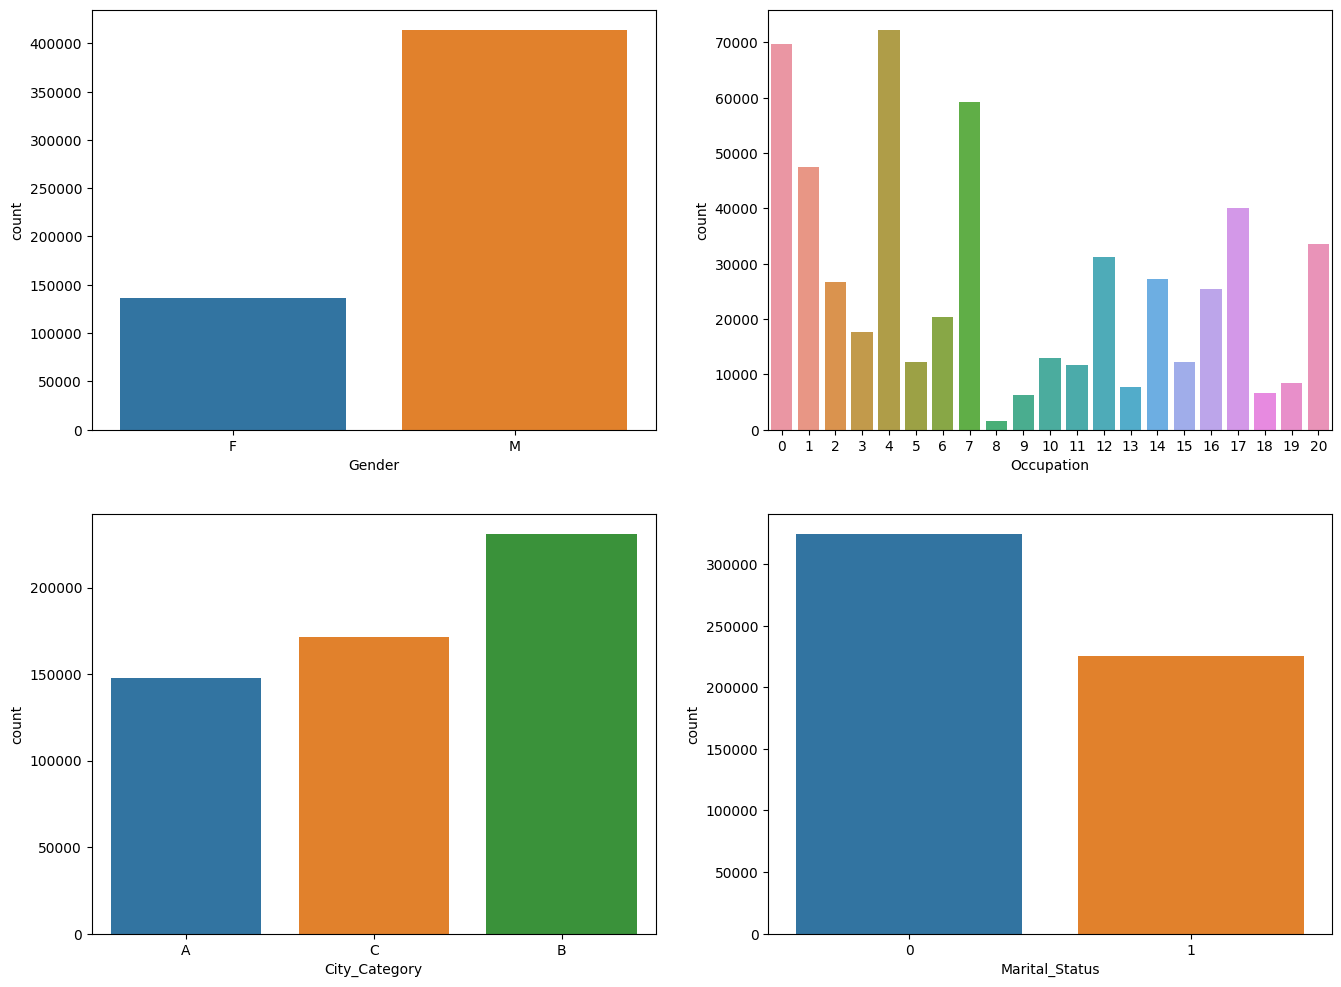

In [ ]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(16,12))
sns.countplot(data=df,x="Gender",ax=axs[0,0])
sns.countplot(data=df,x="Occupation",ax=axs[0,1])
sns.countplot(data=df,x="City_Category",ax=axs[1,0])
sns.countplot(data=df,x="Marital_Status",ax=axs[1,1])

# Observations:
1) Most of the users are male

2) There are 20 different types of occupation and product_category

3) Most of the users resides in "city_category" B.

4) Most users are single as compared to married.

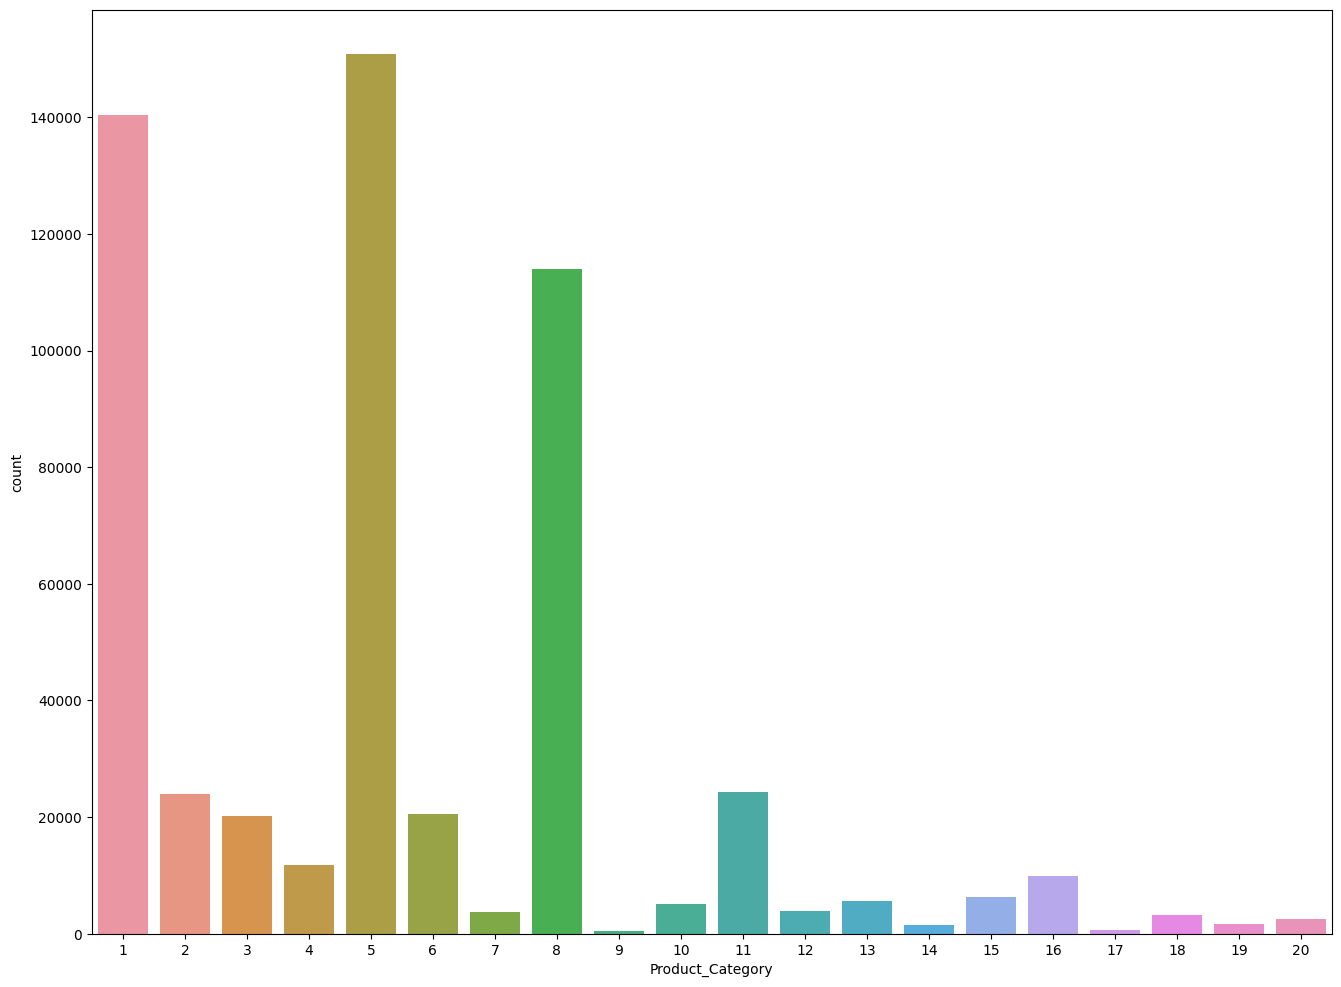

In [ ]:
plt.figure(figsize=(16,12))
sns.countplot(data=df, x='Product_Category')
plt.show()

# Bivariate Analysis

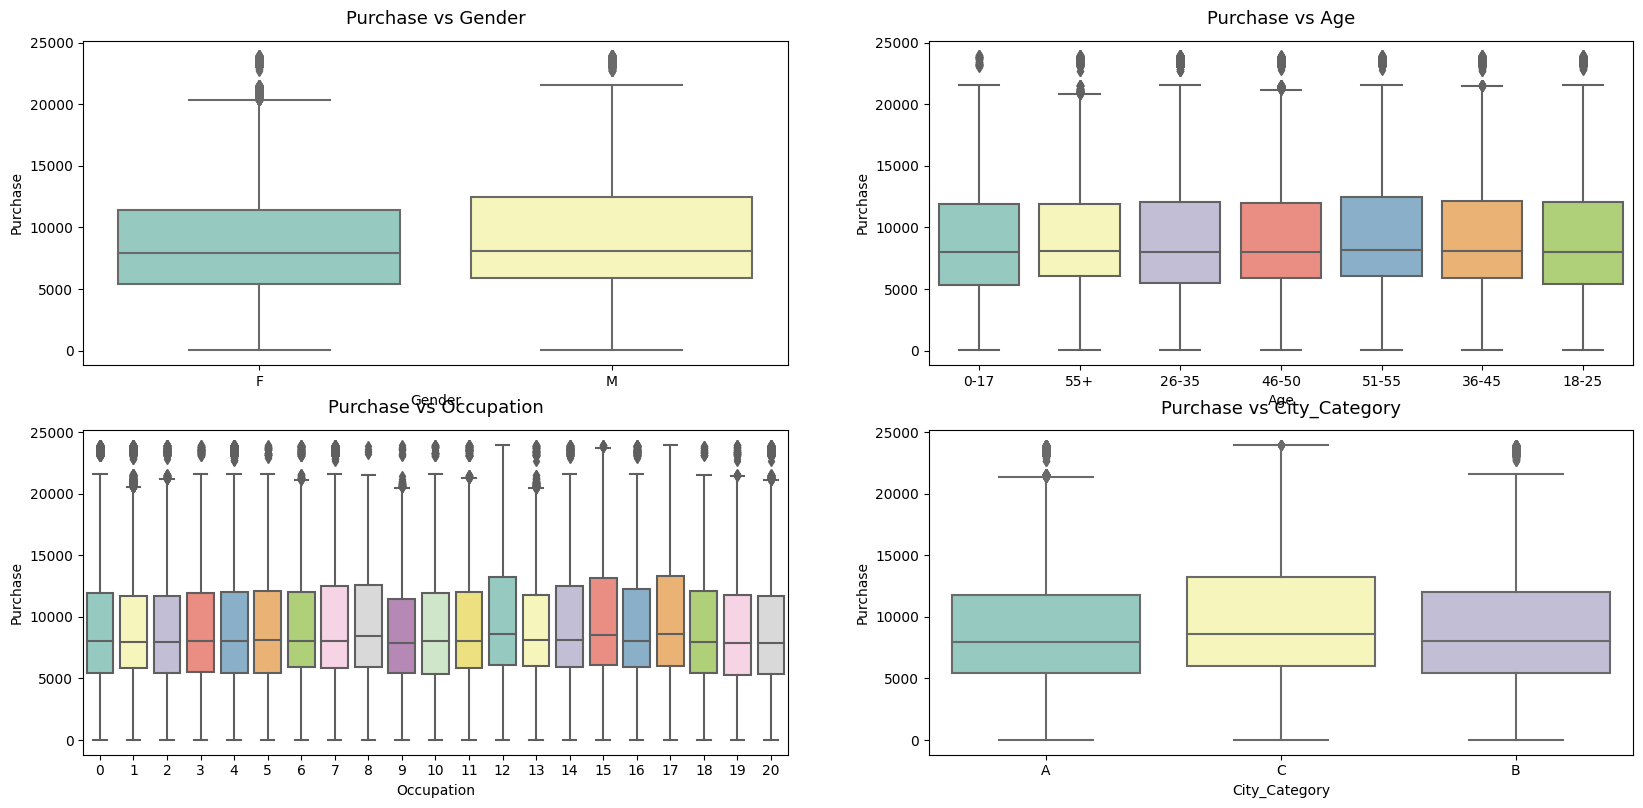

In [ ]:
array= ['Gender', 'Age', 'Occupation', 'City_Category']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,6))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=array[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {array[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

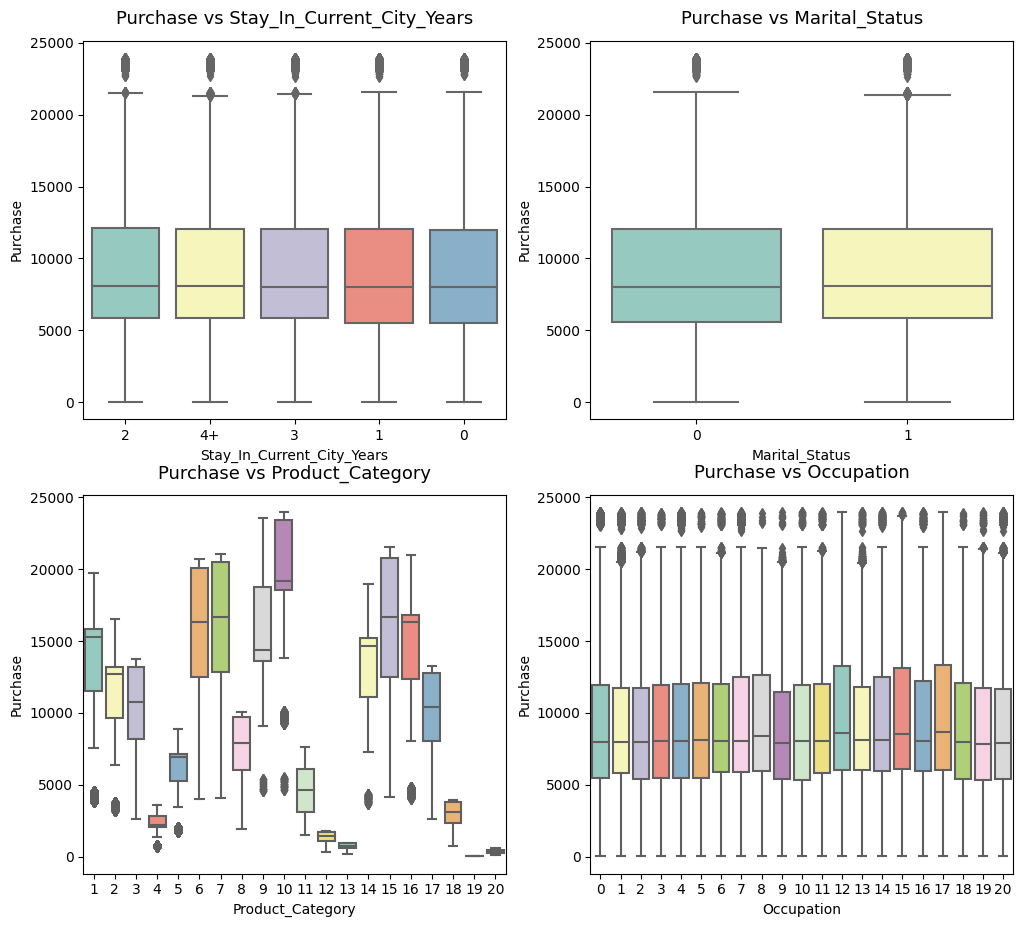

In [ ]:
array_1 = ['Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Occupation']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, y='Purchase', x=array_1[count], ax=axs[row, col], palette='Set3')
        axs[row,col].set_title(f"Purchase vs {array_1[count]}", pad=12, fontsize=13)
        count += 1
plt.show()

# Multivariate analysis

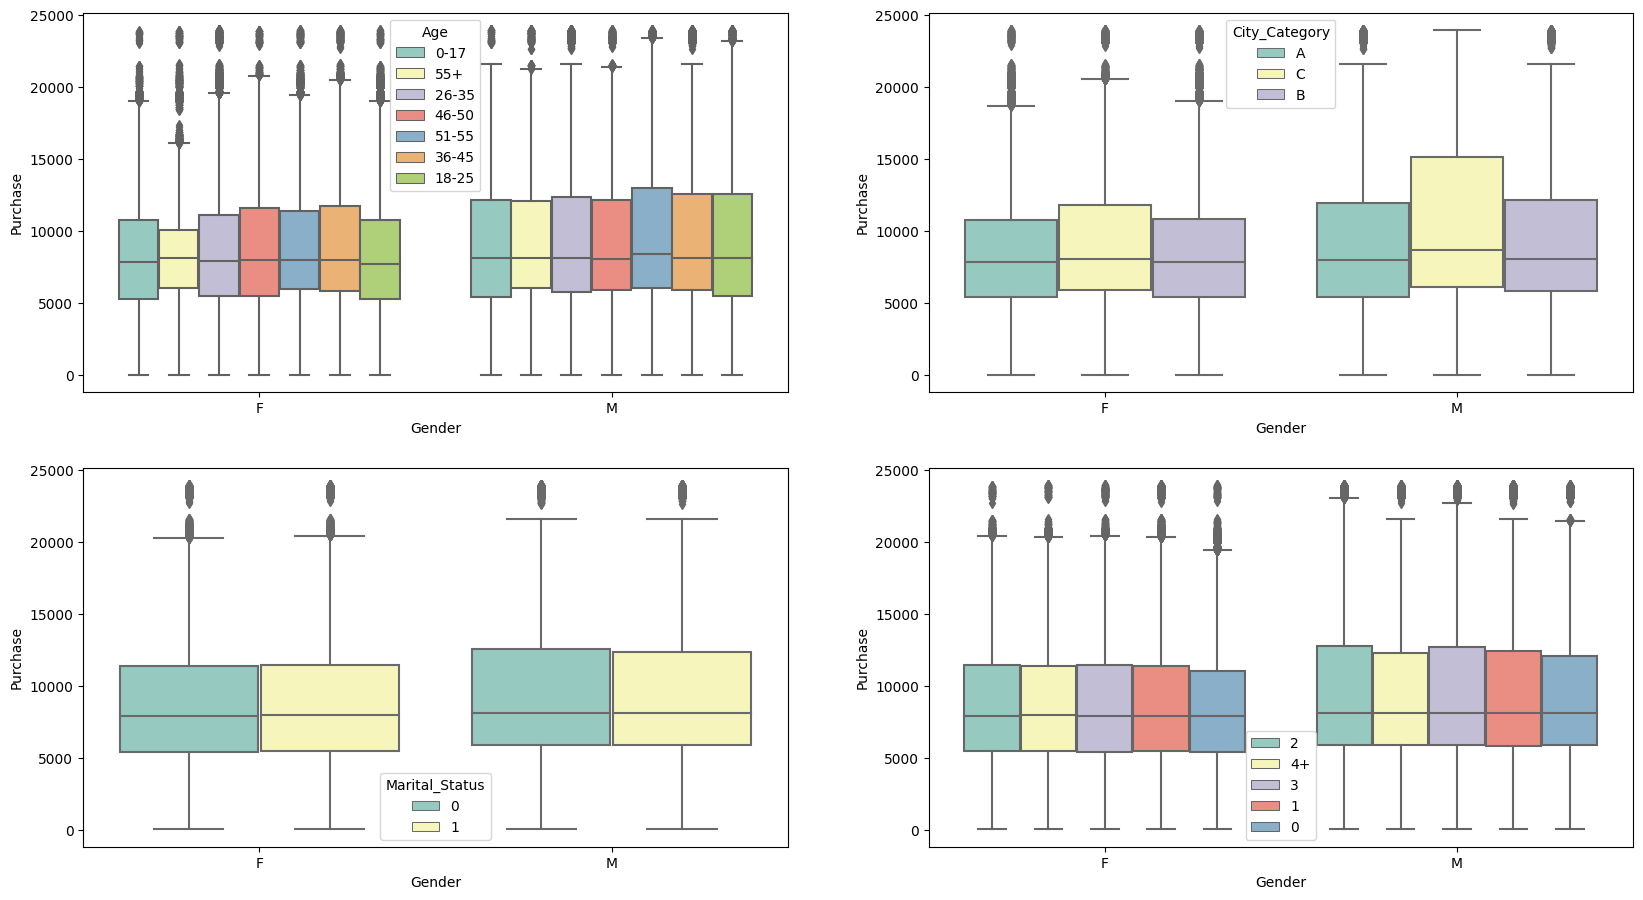

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='best')

plt.show()

# Average amount spend per customer for male and female

In [ ]:
amt_df = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
amt_df.head()


,,Purchase
User_ID,Gender,
1000001,F,334093
1000002,M,810472
1000003,M,341635
1000004,M,206468
1000005,M,821001


In [ ]:
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [ ]:
# gender wise value counts in avg_amt_df
amt_df['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

# Actual Distribution

For males

In [ ]:
male_purchase = amt_df[amt_df["Gender"]=="M"]["Purchase"]
male_purchase.head()

1    810472
2    341635
3    206468
4    821001
6    234668
Name: Purchase, dtype: int64

In [ ]:
male_mu = np.round(np.mean(male_purchase),2)
male_mu

925344.4

In [ ]:
male_std_dev = np.round(np.std(male_purchase),2)
male_std_dev

985713.43

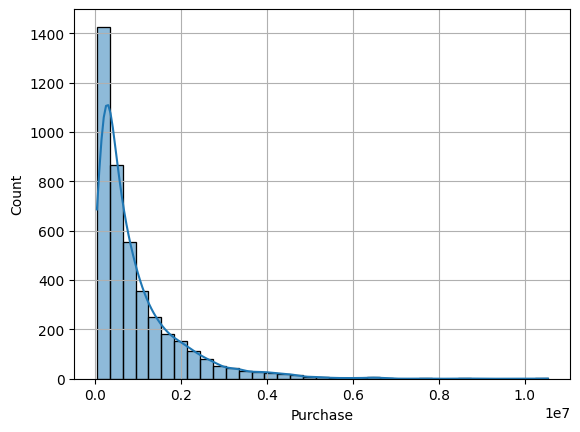

In [ ]:
sns.histplot(male_purchase, kde=True, bins=35)
plt.grid()
plt.show()

for females

In [ ]:
female_purchase = amt_df[amt_df["Gender"]=='F']['Purchase']
female_purchase.head()

0      334093
5      379930
9     2169510
10     557023
15     150490
Name: Purchase, dtype: int64

In [ ]:
female_mu = np.round(np.mean(female_purchase),2)
female_mu

712024.39

In [ ]:
female_std_dev = np.round(np.std(female_purchase),2)
female_std_dev

807128.38

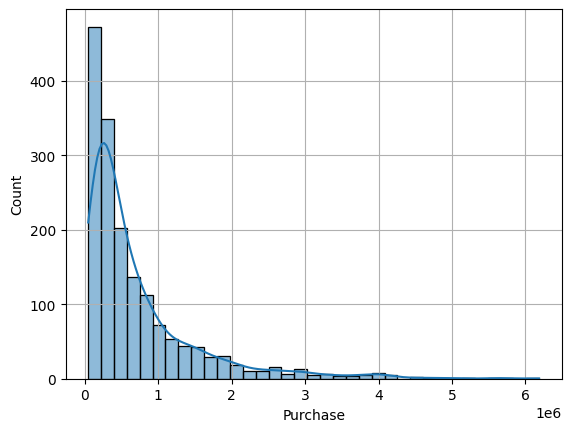

In [ ]:
sns.histplot(female_purchase, kde=True, bins=35)
plt.grid()
plt.show()

# BOOTSTRAPPING

For males

In [ ]:
n=100
male_purchase.sample(n) # random sampling with replacement

297     1090742
661      187350
3190     165871
3811     730356
960      492476
         ...   
3862     499260
3955     207609
4054     764187
2006    5167421
1619     495241
Name: Purchase, Length: 100, dtype: int64

In [ ]:
np.round(np.mean(male_purchase.sample(n)),2) # sample mean of 100 random people

941709.06

In [ ]:
male_sample_mean_100 = [np.round(np.mean(male_purchase.sample(n)),2) for i in range(2000)]
male_sample_mean_100[:5]

[770357.05, 963715.64, 828072.62, 869904.17, 1044040.63]

In [ ]:
male_mean = np.round(np.mean(male_sample_mean_100),2)
male_mean

921875.32

In [ ]:
male_sigma = np.round(np.std(male_sample_mean_100),2)
male_sigma

98346.88

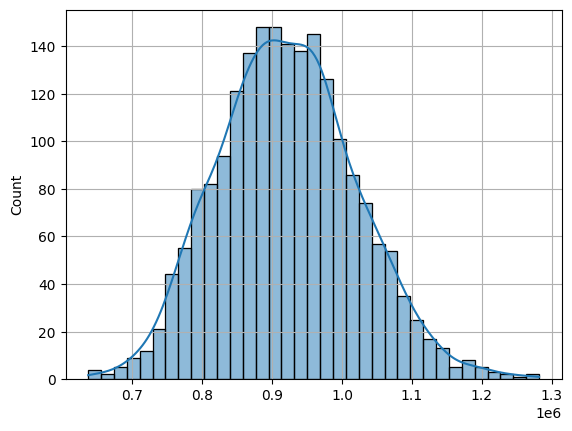

In [ ]:
sns.histplot(male_sample_mean_100, kde=True, bins=35)
plt.grid()
plt.show()

For females

In [ ]:
n=100
female_purchase.sample(n) # random sampling with replacement

164      134698
197      465427
504     1211395
309       84882
4465    3415399
         ...   
991      340061
5457     729033
2954     527105
3255     325301
4549     159326
Name: Purchase, Length: 100, dtype: int64

In [ ]:
np.round(np.mean(female_purchase.sample(n)),2) # sample mean of 100 random people

565369.34

In [ ]:
female_sample_mean_100 = [np.round(np.mean(female_purchase.sample(n)),2) for i in range(2000)]
female_sample_mean_100[:5]

[781428.17, 671056.2, 653760.99, 699385.58, 669194.27]

In [ ]:
female_mean = np.round(np.mean(female_sample_mean_100),2)
female_mean

711509.96

In [ ]:
female_sigma = np.round(np.std(female_sample_mean_100),2)
female_sigma

77533.07

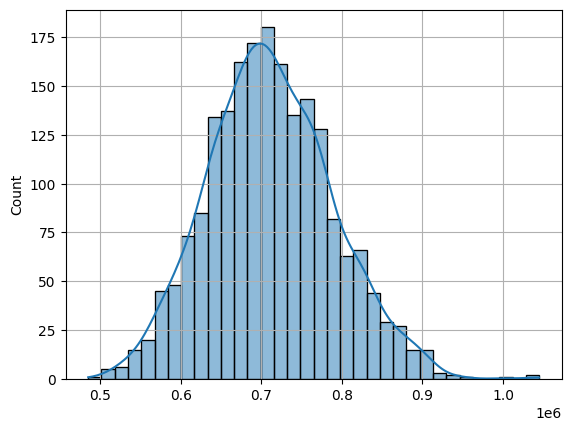

In [ ]:
sns.histplot(female_sample_mean_100, kde=True)
plt.grid()
plt.show()

In [ ]:
print("BOOTSTRAPPING")
print("Average amount spend by Male customers: {:.2f}".format(male_mean))
print("Average amount spend by Female customers: {:.2f}".format(female_mean))

print("std. deviation of Male customers: {:.2f}".format(male_sigma))
print("std. deviation of Female customers: {:.2f}".format(female_sigma))

BOOTSTRAPPING
Average amount spend by Male customers: 921875.32
Average amount spend by Female customers: 711509.96
std. deviation of Male customers: 98346.88
std. deviation of Female customers: 77533.07


In [ ]:
# After bootstrapping the spread(sigma) of the graph is reduced.
# lesser the value of sigma better the graph.

# 95% Confidence Interval

In [ ]:
# For males

In [ ]:
from scipy.stats import norm

In [ ]:
z_x1 = norm.ppf(0.025)
z_x1

-1.9599639845400545

In [ ]:
z_x2 = norm.ppf(0.975)
z_x2

1.959963984540054

In [ ]:
n = len(male_purchase)
n

4225

In [ ]:
n_1 = len(female_purchase)
n_1

1666

In [ ]:
population_male_mean = 925344.40
population_std_dev_male = 985713.43
std_error=population_std_dev_male/(n)**0.5
std_error

15164.822

In [ ]:
population_female_mean = 712024.39
population_std_dev_female = 807128.38
std_error_1=population_std_dev_female/(n_1)**0.5
std_error_1

19774.482171195035

In [ ]:
x1 = z_x1*std_error + population_male_mean
x1 = round(x1)
x1

895622

In [ ]:
x1_1 = z_x1*std_error_1 + population_female_mean
x1_1 = round(x1_1)
x1_1

673267

In [ ]:
x2 = z_x2*std_error + population_male_mean
x2 = round(x2)
x2

955067

In [ ]:
x2_1 = z_x2*std_error_1 + population_female_mean
x2_1 = round(x2_1)
x2_1

750782

# Actual distribution
Average amount spend by Male customers: 925344.40

Average amount spend by Female customers: 712024.39

# using Central Limit Theorem
Average amount spend by male customers is 9,21,875.32

Average amount spend by female customers is 7,11,509.96

# 95% Confidence Interval by Gender
Now we can infer about the population that, 95% of the times:

Average amount spend by male customer will lie in between: (8,95,622, 9,55,067)

Average amount spend by female customer will lie in between: (6,73,267, 7,50,782)

# Doing the same Activity for Married and Unmarried

In [ ]:
marital_df = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
marital_df.head()

,,Purchase
User_ID,Marital_Status,
1000001,0,334093
1000002,0,810472
1000003,0,341635
1000004,1,206468
1000005,1,821001


In [ ]:
marital_df = marital_df.reset_index()
marital_df.head()

,User_ID,Marital_Status,Purchase
0,1000001,0,334093
1,1000002,0,810472
2,1000003,0,341635
3,1000004,1,206468
4,1000005,1,821001


# Actual distribution

For Unmarried

In [ ]:
unmarried_purchase = marital_df[marital_df["Marital_Status"]==0]["Purchase"]
unmarried_purchase.head()

0    334093
1    810472
2    341635
5    379930
8    594099
Name: Purchase, dtype: int64

In [ ]:
unmarried_mu = np.round(np.mean(unmarried_purchase),2)
unmarried_mu

880575.78

In [ ]:
unmarried_std_dev = np.round(np.std(unmarried_purchase),2)
unmarried_std_dev

949297.31

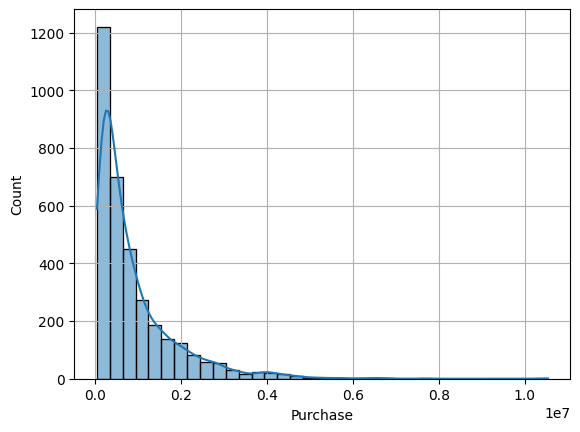

In [ ]:
sns.histplot(unmarried_purchase, kde=True, bins=35)
plt.grid()
plt.show()

For Married

In [ ]:
married_purchase = marital_df[marital_df["Marital_Status"]==1]["Purchase"]
married_purchase.head()

3     206468
4     821001
6     234668
7     796593
9    2169510
Name: Purchase, dtype: int64

In [ ]:
married_mu = np.round(np.mean(married_purchase),2)
married_mu

843526.8

In [ ]:
married_std_dev = np.round(np.std(married_purchase),2)
married_std_dev

935163.06

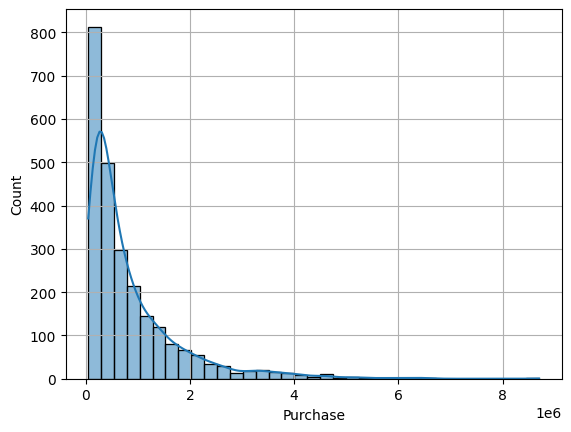

In [ ]:
sns.histplot(married_purchase, kde=True, bins=35)
plt.grid()
plt.show()

# BOOTSTRAPPING

In [ ]:
n=100
unmarried_purchase.sample(n)

4227     433531
3844    1467886
3372     281107
4314     164493
3313     126156
         ...   
606     2126253
3649     525557
937      375706
3419    1483461
2498     398523
Name: Purchase, Length: 100, dtype: int64

In [ ]:
np.round(np.mean(unmarried_purchase.sample(n)),2)

880672.85

In [ ]:
unmarried_sample_mean_100 = [np.round(np.mean(unmarried_purchase.sample(n)),2) for i in range(2000)]
unmarried_sample_mean_100[:5]

[937985.36, 1125545.46, 921271.22, 883056.46, 799104.96]

In [ ]:
unmarried_mean = np.round(np.mean(unmarried_sample_mean_100),2)
unmarried_mean

877956.67

In [ ]:
unmarried_sigma = np.round(np.std(unmarried_sample_mean_100),2)
unmarried_sigma

95250.09

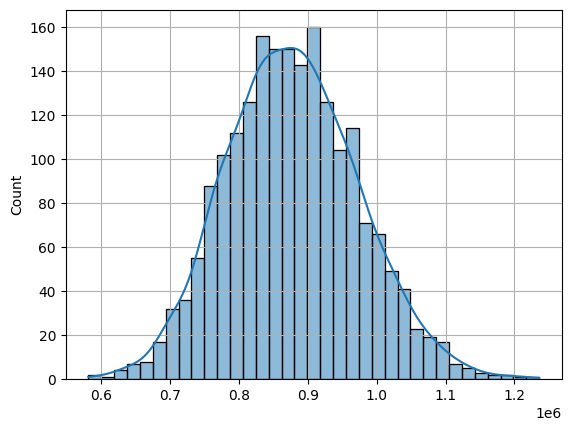

In [ ]:
sns.histplot(unmarried_sample_mean_100, kde=True, bins=35)
plt.grid()
plt.show()

For married

In [ ]:
n=100
married_purchase.sample(n)

2042     535434
302     2790537
2173     798853
4639     142575
581      322597
         ...   
442     1175712
418     1530944
3287     128910
4207     234934
3526    2073593
Name: Purchase, Length: 100, dtype: int64

In [ ]:
np.round(np.mean(married_purchase.sample(n)),2) # random mean of 100 people

844919.58

In [ ]:
married_sample_mean_100 = [np.round(np.mean(married_purchase.sample(n)),2) for i in range(2000)]
married_sample_mean_100[:5]

[791925.11, 946259.3, 775366.54, 939881.25, 821661.5]

In [ ]:
married_mean = np.round(np.mean(married_sample_mean_100),2)
married_mean

845232.35

In [ ]:
married_sigma = np.round(np.std(married_sample_mean_100),2)
married_sigma

91412.42

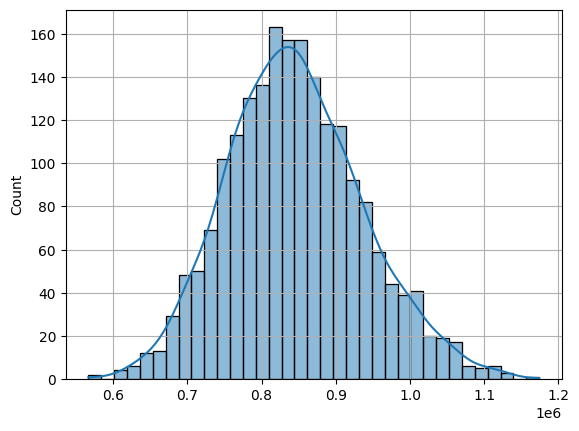

In [ ]:
sns.histplot(married_sample_mean_100, kde=True, bins=35)
plt.grid()
plt.show()

In [ ]:
print("BOOTSTRAPPING")
print("Average amount spend by unmarried customers: {:.2f}".format(unmarried_mean))
print("Average amount spend by married customers: {:.2f}".format(married_mean))

print("std. deviation of unmarried customers: {:.2f}".format(unmarried_sigma))
print("std. deviation of married customers: {:.2f}".format(married_sigma))

BOOTSTRAPPING
Average amount spend by unmarried customers: 877956.67
Average amount spend by married customers: 845232.35
std. deviation of unmarried customers: 95250.09
std. deviation of married customers: 91412.42


In [ ]:
# After bootstrapping the spread(sigma) of the graph is reduced.
# lesser the value of sigma better the graph.

# 95% Confidence Interval

In [ ]:
z_x1 = norm.ppf(0.025)
z_x1

-1.9599639845400545

In [ ]:
z_x2 = norm.ppf(0.975)
z_x2

1.959963984540054

In [ ]:
len(unmarried_purchase)

3417

In [ ]:
len(married_purchase)

2474

In [ ]:
unmarried_population_mean = 880575.78
unmarried_population_std_dev = 949297.31
std_error = unmarried_population_std_dev/(len(unmarried_purchase))**0.5
std_error

16239.765762841793

In [ ]:
married_population_mean = 843526.80
married_population_std_dev = 935163.06
std_error = married_population_std_dev/(len(married_purchase))**0.5
std_error

18801.283397478626

In [ ]:
x1 = z_x1*std_error + unmarried_population_mean
x1 = np.round(x1)
x1

843726.0

In [ ]:
x1 = z_x1*std_error + married_population_mean
x1 = np.round(x1)
x1

806677.0

In [ ]:
x2 = z_x2*std_error + unmarried_population_mean
x2 = np.round(x2)
x2

917426.0

In [ ]:
x2 = z_x2*std_error + married_population_mean
x2 = np.round(x2)
x2

880377.0

# Actual distribution
Average amount spend by unmarried customers: 8,80,575

Average amount spend by married customers: 8,43,526

# using Central Limit Theorem
Average amount spend by unmarried customers is 8,77,957.

Average amount spend by married customers is 8,45,232.

# 95% Confidence Interval by Marital status
Now we can infer about the population that, 95% of the times:
Average amount spend by unmarried customers will lie in between: (8,43,726, 9,17,426)

Average amount spend by married customers will lie in between: (8,06,677, 8,80,377)


# Calculating the amount spent by Age

In [ ]:
amt_df = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
amt_df = amt_df.reset_index()
amt_df.head()

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001


In [ ]:
sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for age_interval in age_intervals:
    all_means[age_interval] = []

for age_interval in age_intervals:
    for _ in range(num_repitions):
        mean = amt_df[amt_df['Age']==age_interval].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[age_interval].append(mean)

In [ ]:
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = amt_df[amt_df['Age']==val]

    margin_of_error_clt = 1.96*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - margin_of_error_clt
    upper_lim = sample_mean + margin_of_error_clt

    print("For age {} --> confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 --> confidence interval of means: (945034.42, 1034284.21)
For age 36-45 --> confidence interval of means: (823347.80, 935983.62)
For age 18-25 --> confidence interval of means: (801632.78, 908093.46)
For age 46-50 --> confidence interval of means: (713505.63, 871591.93)
For age 51-55 --> confidence interval of means: (692392.43, 834009.42)
For age 55+ --> confidence interval of means: (476948.26, 602446.23)
For age 0-17 --> confidence interval of means: (527662.46, 710073.17)


# 95% Confidence Interval by Age
Now we can infer about the population that, 95% of the times:

Average amount spend for Age(0-17) will lie in between: (5,27,662, 7,10,073)

Average amount spend by Age(18-25) will lie in between: (8,01,632, 9,08,093)

Average amount spend for Age(26-35) will lie in between: (9,45,034, 10,34,284)

Average amount spend by Age(36-45) will lie in between: (8,23,347, 9,35,983)

Average amount spend for Age(46-50) will lie in between: (7,13,505, 8,71,591)

Average amount spend by Age(51-55) will lie in between: (6,92,392, 8,34,009)

Average amount spend by Age(55+) will lie in between: (4,76,948, 6,02,446)

# Recommendations:

1) Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.

2) Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.

3) Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

4) Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45

5) Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.